<a href="https://colab.research.google.com/github/techthumb1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module4-make-explanatory-visualizations/Jason_Robinson_LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#Incorporate the type of style I will use for the display
plt.style.use('fast')

In [0]:
#Other availabel styles
plt.style.available

['seaborn',
 'ggplot',
 'seaborn-talk',
 'seaborn-ticks',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-notebook',
 'seaborn-dark',
 'seaborn-bright',
 'tableau-colorblind10',
 'bmh',
 'seaborn-colorblind',
 'fivethirtyeight',
 'seaborn-paper',
 'seaborn-whitegrid',
 'fast',
 'classic',
 'grayscale',
 'seaborn-darkgrid',
 'seaborn-dark-palette',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-poster',
 '_classic_test',
 'seaborn-muted',
 'dark_background']

In [0]:
#Load the titanic dataset
df = pd.read_csv('https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv')
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [0]:
#I can display categorical data using number or string values
df['cabin_class']=df['Pclass'].map({1:'first', 2:'second', 3: 'third'})
df[['cabin_class', 'Pclass']].head()

,cabin_class,Pclass
0,third,3
1,first,1
2,third,3
3,first,1
4,third,3


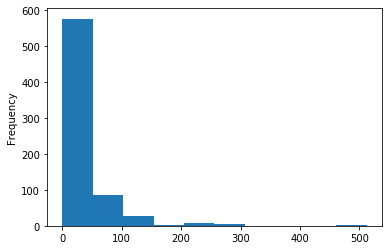

In [0]:
# Histograms are capable of displaying continuous variables
df['Fare'].plot(kind='hist');

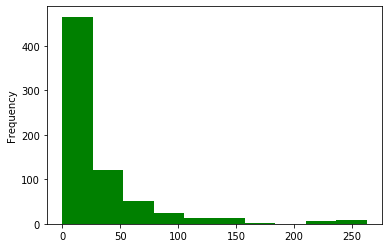

In [0]:
# I can filter the hist to remove any outliers and add a color change
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist', color='green');

In [0]:
#Use bins from low to very high
farebins = [0, 8, 15, 33, 512]
farelabels = ['low', 'medium', 'high', 'vhigh']

df['fare_groups']=pd.cut(df['Fare'],
                        bins=farebins,
                        labels=farelabels)

In [0]:
#View the results of the fare labels
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

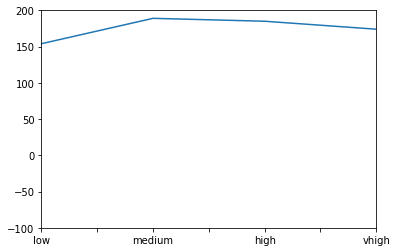

In [0]:
myresults.plot(ylim=(-100,200));

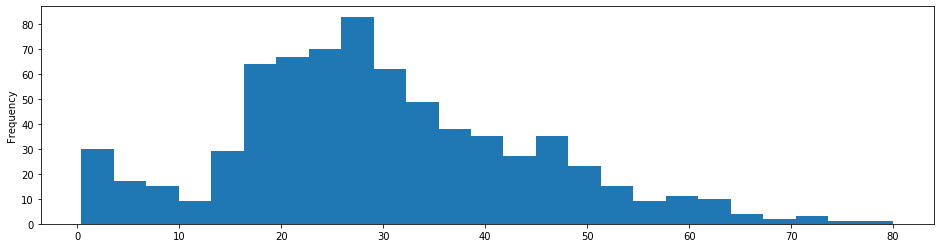

In [0]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16, 4));

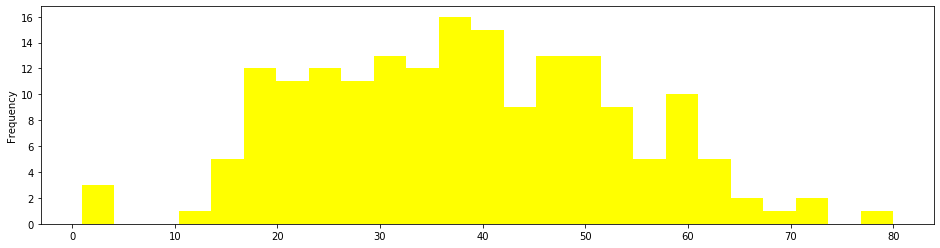

In [0]:
df[df['cabin_class']=='first']          ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='tan');
df[df['cabin_class']=='first']          ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='blue');
df[df['cabin_class']=='first']          ['Age'].plot(kind='hist', bins=25, figsize=(16, 4), color='yellow');

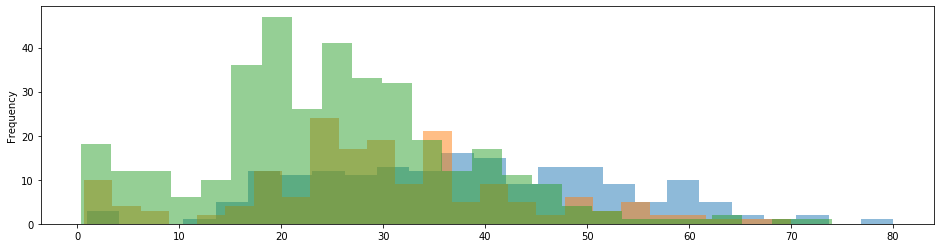

In [0]:
#Add the alpha function to make the display transparency
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5);
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5);
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16, 4), alpha=0.5);

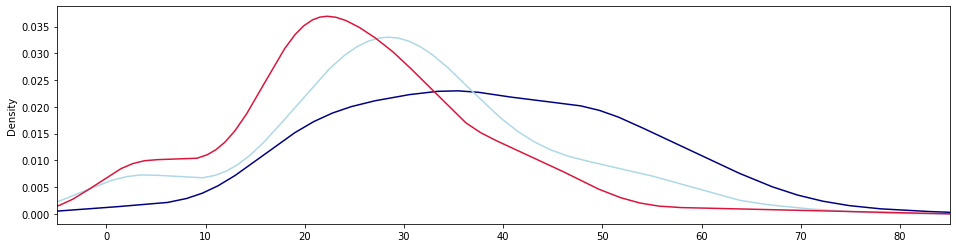

In [0]:
#Kernel density estimate
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='navy');
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='lightblue');
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16, 4), color='crimson');

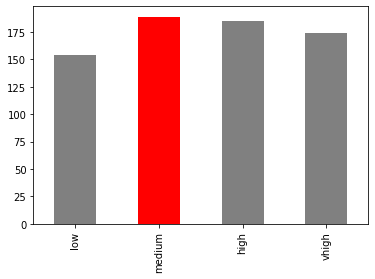

In [0]:
#Use colors to accentuate display
myresults = df['fare_groups'].value_counts().sort_index()
myresults.plot(kind='bar', color=['gray', 'red', 'gray', 'gray']);

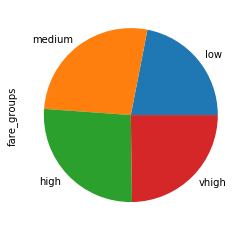

In [0]:
#Pie chart
myresults.plot(kind='pie');

In [0]:
#Now I can compare categorical data using the crosstab function
cab_death = pd.crosstab(df['cabin_class'], df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


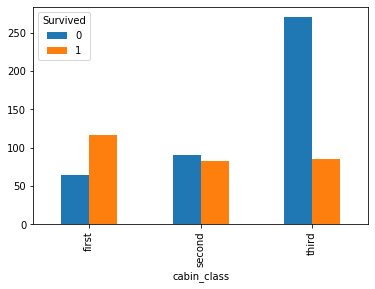

In [0]:
#Create a bar chart out of cab_death 
cab_death.plot(kind='bar');

In [0]:
#Now I need to get the percentages with using the normalize method
cab_death = pd.crosstab(df['cabin_class'], df['Survived'], normalize='columns')
cab_death

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


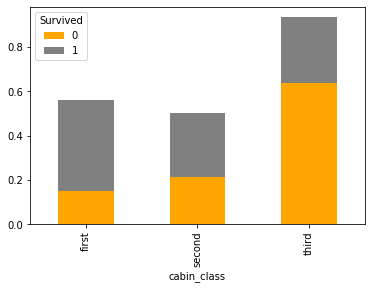

In [0]:
# Create a stacked bar chart
cab_death.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [0]:
cab_death2 = pd.crosstab(df['cabin_class'], df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


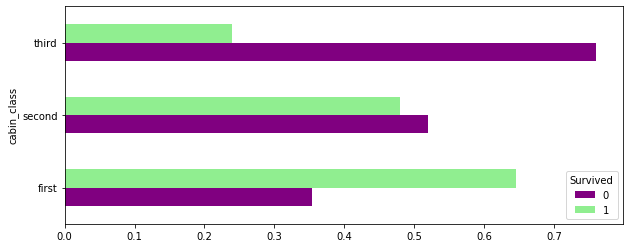

In [0]:
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10, 4));
cab_death2

In [0]:
df['Age'].mean()

29.618011283497882

In [0]:
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

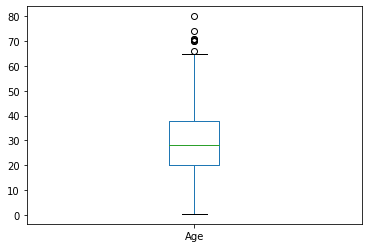

In [0]:
df['Age'].plot(kind='box');

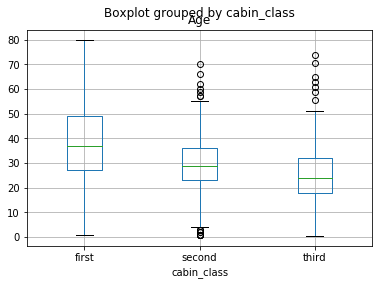

In [0]:
df.boxplot(column='Age', by='cabin_class');

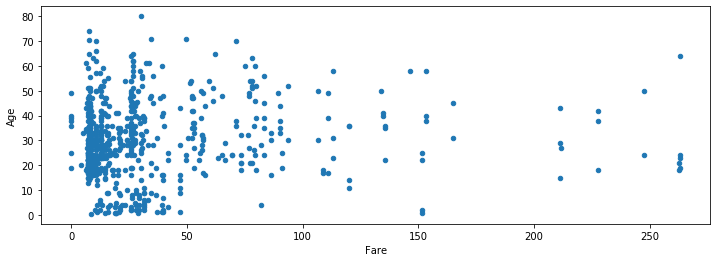

In [0]:
df.plot(kind='scatter', x='Fare', y='Age', figsize=(12,4));

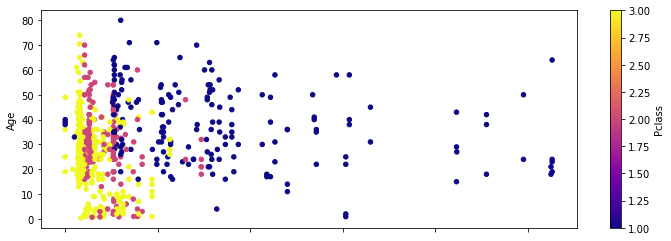

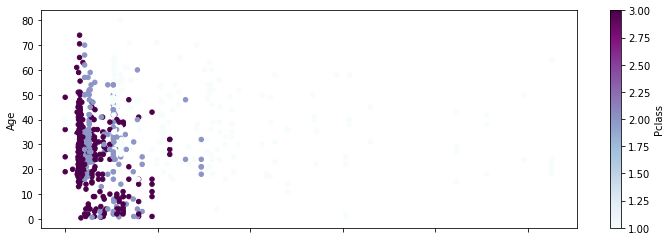

In [0]:
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(12,4));
df.plot(kind='scatter', x='Fare', y='Age', c='Pclass', colormap='BuPu', figsize=(12,4));

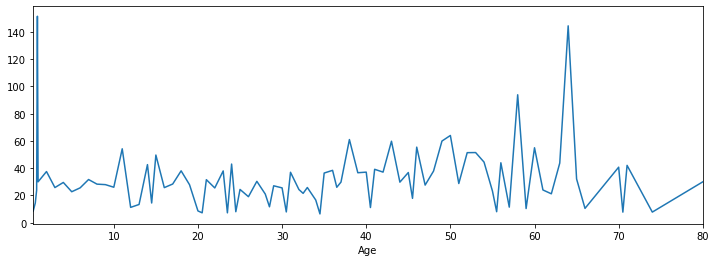

In [0]:
df.groupby('Age',) ['Fare'].mean().plot(figsize=(12,4));

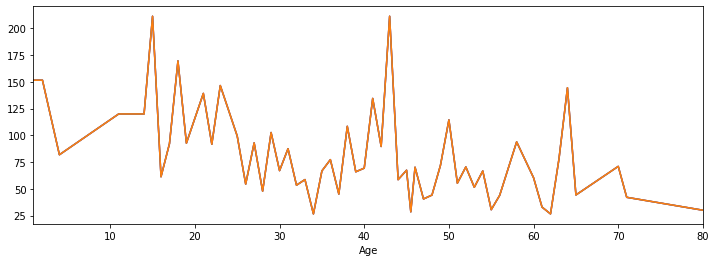

In [0]:
# Line chart: age by fare and cabin class
mycolors = ['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
df[df['cabin_class']=='first'].groupby('Age',) ['Fare'].mean().plot(figsize=(12,4), color='crimson');
df[df['cabin_class']=='first'].groupby('Age',) ['Fare'].mean().plot(figsize=(12,4));
df[df['cabin_class']=='first'].groupby('Age',) ['Fare'].mean().plot(figsize=(12,4));

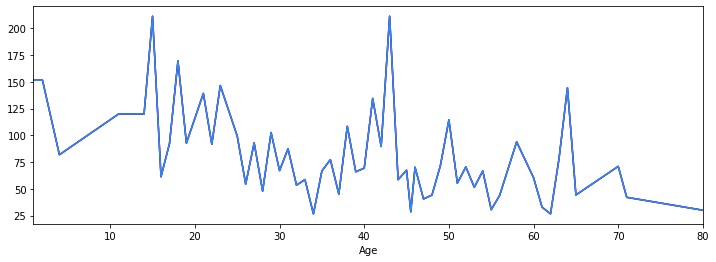

In [0]:
# Line chart: age by fare and cabin class
mycolors = ['crimson', 'purple', 'dodgerblue']
cab_classes =['first', 'second', 'third'] 
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [0,1,2]:
  df[df['cabin_class']=='first'].groupby('Age',) ['Fare'].mean().plot(figsize=(12,4), color=mycolors[x]);


In [0]:
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


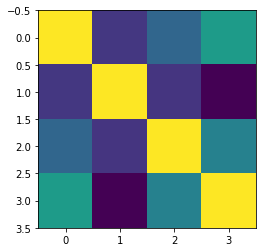

In [0]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

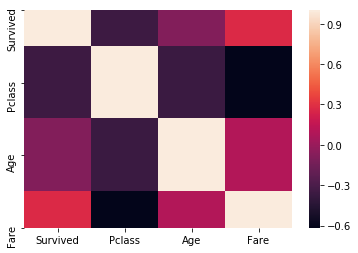

In [0]:
sns.heatmap(corr_matrix);

In [0]:
x = np.linspace(0, 5, 11)
y = x **2

In [0]:
x

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [0]:
y

array([ 0.  ,  0.25,  1.  ,  2.25,  4.  ,  6.25,  9.  , 12.25, 16.  ,
       20.25, 25.  ])

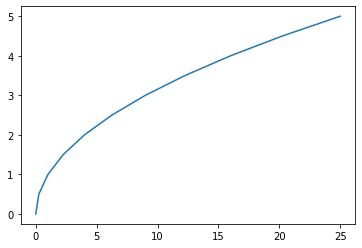

In [0]:
plt.plot(y, x);

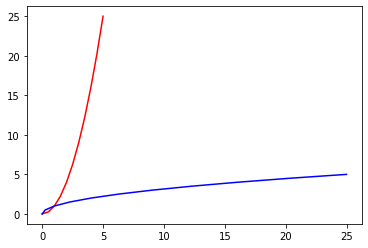

In [0]:
plt.plot(x, y, 'r');
plt.plot(y, x, 'b');

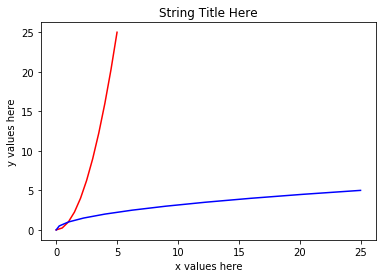

In [0]:
plt.plot(x, y, 'r');
plt.plot(y, x, 'b');
plt.xlabel('x values here')
plt.ylabel('y values here')
plt.title('String Title Here');

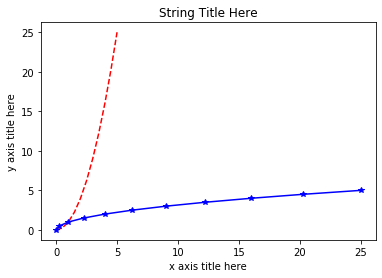

In [0]:
plt.plot(x, y, 'r--');
plt.plot(y, x, 'b*-');
plt.xlabel('x axis title here')
plt.ylabel('y axis title here')
plt.title('String Title Here');

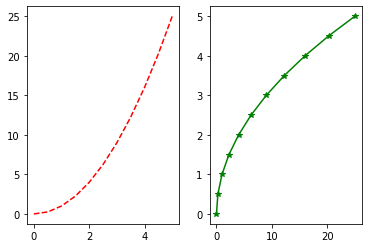

In [0]:
plt.subplot(1, 2, 1)
plt.plot(x, y, 'r--')
plt.subplot(1, 2, 2)
plt.plot(y, x, 'g*-');

 Matplotlib Object Oriented Method

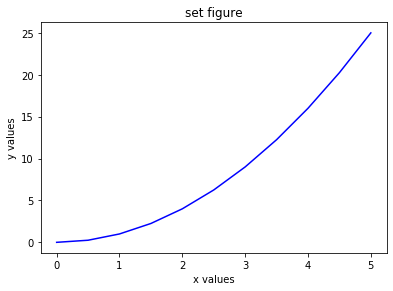

In [0]:
# Create Figure (empty canvas)
fig = plt.figure()
# Add set of axes to figure
axes = fig.add_axes([0.2, 0.2, 0.8, 0.8])
# left, bottom, width, height (range 0 to 1)
# Plot on that set of axes
axes.plot(x, y, 'b')
axes.set_xlabel('x values')
axes.set_ylabel('y values')
axes.set_title('set figure');
# Notice the eluse of set_ to begin methods

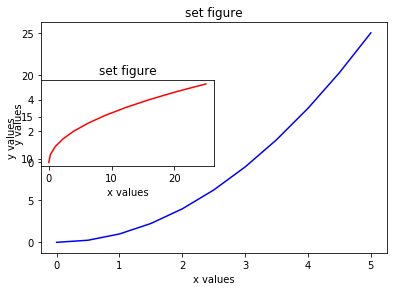

In [0]:
#Start with a blank canvas and am just going to build on to previous code
fig = plt.figure()
#Add a set of axes (range 0 to 1)
# left, bottom, width, height 
axes1 = fig.add_axes([0.2, 0.2, 0.8, 0.8])
axes2 = fig.add_axes([0.2, 0.5, 0.4, 0.3])
# Plot on that set of axes to create a nested axes
#Axes1
axes1.plot(x, y, 'b')
axes1.set_xlabel('x values')
axes1.set_ylabel('y values')
axes1.set_title('set figure')
#Axes2
axes2.plot(y, x, 'r')
axes2.set_xlabel('x values')
axes2.set_ylabel('y values')
axes2.set_title('set figure');

 The subplots() method

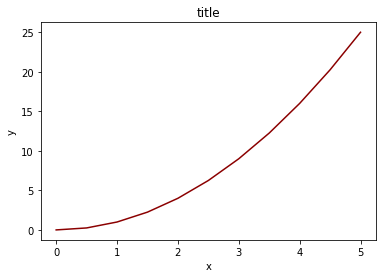

In [0]:
# Use similar to plt.figure() except use tuple unpacking to grab fig and axes
# The default is `(1, 1)` so you don't actually have to specify this.
fig,axes = plt.subplots(nrows=1, ncols=1)
axes.plot(x, y, 'darkred')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title');

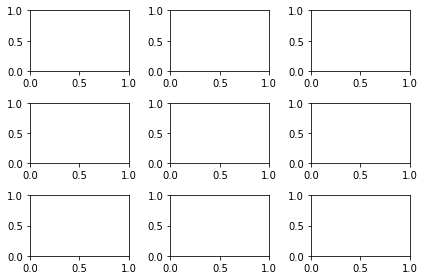

In [0]:
fig,axes = plt.subplots(nrows=3, ncols=3)
fig
plt.tight_layout();

In [0]:
#Since I specified 3rows and 3columns a set of nine objects
axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f15f3640588>,
      dtype=object)

In [0]:
for ax in ax:
  ax.plot(x, y, 'b')
  ax.set_xlabel('x values')
  ax.set_ylabel('y values')
  ax.set_title('title')

fig

TypeError: ignored

In [0]:
for a in ax:
  ax.plot(x, y, 'b')
  ax.set(xlabel='x values',
           ylabel='y values',
           title='set figure')
fig

TypeError: ignored

 Figure size, aspect ratio and DPI

In [0]:
fig = plt.figure(figsize=(8, 4), dpi=100);
fig

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

Text(0.5, 1.0, 'title')

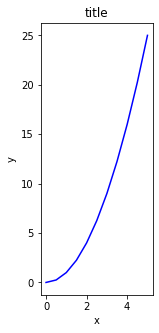

In [0]:
fig, axes = plt.subplots(figsize=(2 ,5))
axes.plot(x, y, 'b')
axes.set_xlabel('x')
axes.set_ylabel('y')
axes.set_title('title')

 Saving Figures

In [0]:
#High qyality outputs
fig.savefig('filename.png')

In [0]:
fig.savefig('filename1.jpg', dpi=200)

Legends, label, and titles

In [0]:
axes.set_title('title')

Text(0.5, 1, 'title')

In [0]:
axes.set_xlabel('values')

Text(0.5, 66.44444444444444, 'values')

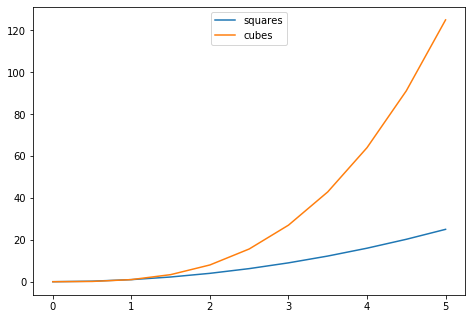

In [0]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax
ax.plot(x, x**2, label='squares')
ax.plot(x, x**3, label='cubes')
plt.legend(loc=9);

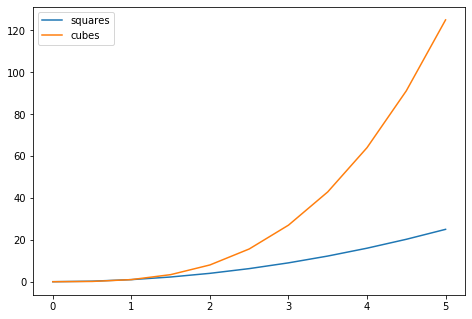

In [0]:
ax.legend(loc=1)
ax.legend(loc=2)
ax.legend(loc=3)
ax.legend(loc=4)

ax.legend()
fig

Setting colors, linewidths, and linetypes

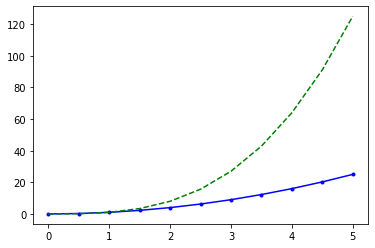

In [0]:
fig, ax = plt.subplots()
ax.plot(x, x**2,'b.-')
ax.plot(x, x**3,'g--');

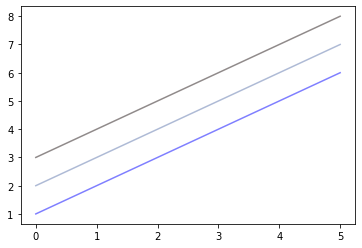

In [0]:
fig, ax = plt.subplots()

ax.plot(x, x+1, color='blue', alpha=0.5)
ax.plot(x, x+2, color='#5F77AD', alpha=0.5)
ax.plot(x, x+3, color='#221717', alpha=0.5);

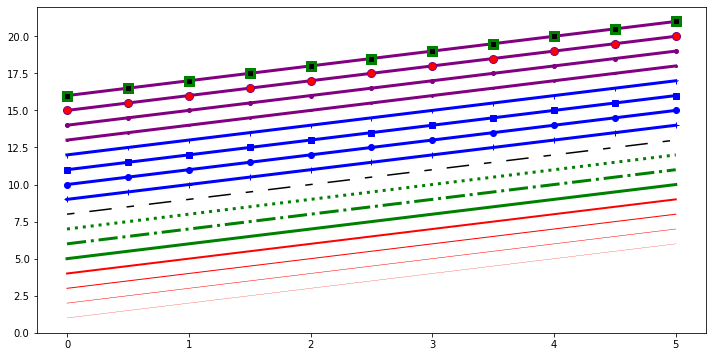

In [0]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(x, x+1, color='red', linewidth=0.25)
ax.plot(x, x+2, color='red', linewidth=0.50)
ax.plot(x, x+3, color='red', linewidth=1.00)
ax.plot(x, x+4, color='red', linewidth=2.00)

ax.plot(x, x+5, color='green', lw=3, linestyle='-')
ax.plot(x, x+6, color='green', lw=3, linestyle='-.')
ax.plot(x, x+7, color='green', lw=3, linestyle=':')

line, = ax.plot(x, x+8, color='black', lw=1.50)
line.set_dashes([5, 10, 15, 10])

ax.plot(x, x+9, color='blue', lw=3, ls='-', marker='+')
ax.plot(x, x+10, color='blue', lw=3, ls='-', marker='o')
ax.plot(x, x+11, color='blue', lw=3, ls='-', marker='s')
ax.plot(x, x+12, color='blue', lw=3, ls='-', marker='1')

ax.plot(x, x+13, color='purple', lw=3, ls='-', marker='o', markersize=2)
ax.plot(x, x+14, color='purple', lw=3, ls='-', marker='o', markersize=4)
ax.plot(x, x+15, color='purple', lw=3, ls='-', marker='o', markersize=8, markerfacecolor='red')
ax.plot(x, x+16, color='purple', lw=3, ls='-', marker='s', markersize=8, 
        markerfacecolor='black', markeredgewidth=3, markeredgecolor='green');

Plot Range

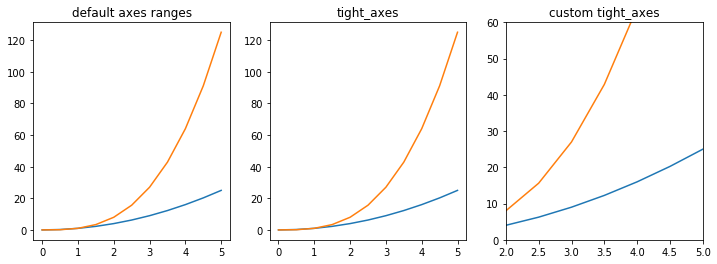

In [0]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].plot(x, x**2, x, x**3)
axes[0].set_title('default axes ranges')

axes[1].plot(x, x**2, x, x**3)
axes[1].axis('tight')
axes[1].set_title('tight_axes')

axes[2].plot(x, x**2, x, x**3)
axes[2].set_ylim([0, 60])
axes[2].set_xlim([2, 5])
axes[2].set_title('custom tight_axes');

Imitate a real world example

In [0]:
#Create fake prototypes
# what styles are available in matplotlib? There's one for 538.
print(plt.style.available[:5])
plt.style.use('fivethirtyeight')

['seaborn', 'ggplot', 'seaborn-talk', 'seaborn-ticks', 'Solarize_Light2']


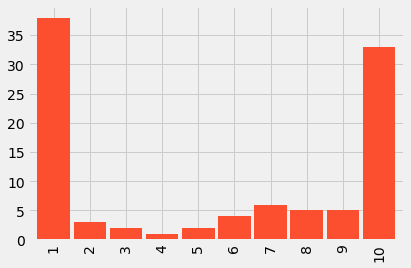

In [0]:
# Create fake data to replicate the blog post figure.
fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33],index=range(1,11))
fake.plot.bar(color='C1', width=0.9);

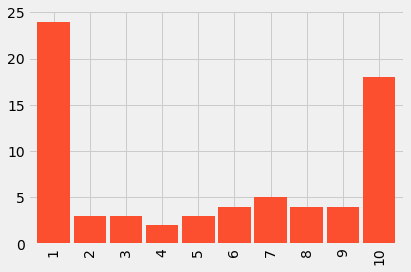

In [0]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);


Annotate with text

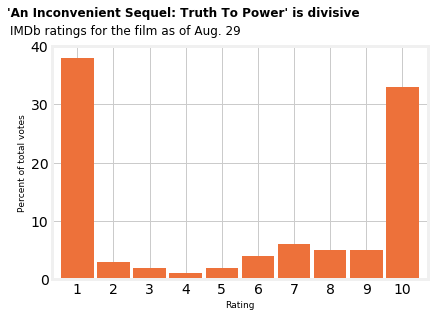

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")

# Set the bars
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));


In [0]:
#Reproduce with real data from 538's github
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

In [0]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [0]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [0]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()


,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
final = lastday_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [0]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [0]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


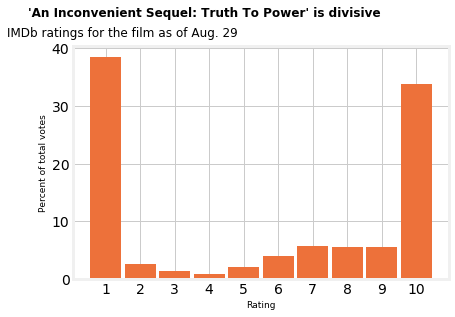

In [0]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

Reproduce own version

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/airline-safety/airline-safety.csv')
df.head()

,airline,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
0,Aer Lingus,320906734,2,0,0,0,0,0
1,Aeroflot*,1197672318,76,14,128,6,1,88
2,Aerolineas Argentinas,385803648,6,0,0,1,0,0
3,Aeromexico*,596871813,3,1,64,5,0,0
4,Air Canada,1865253802,2,0,0,2,0,0


In [0]:
df.shape

(56, 8)

In [0]:
df.columns

Index(['airline', 'avail_seat_km_per_week', 'incidents_85_99',
       'fatal_accidents_85_99', 'fatalities_85_99', 'incidents_00_14',
       'fatal_accidents_00_14', 'fatalities_00_14'],
      dtype='object')

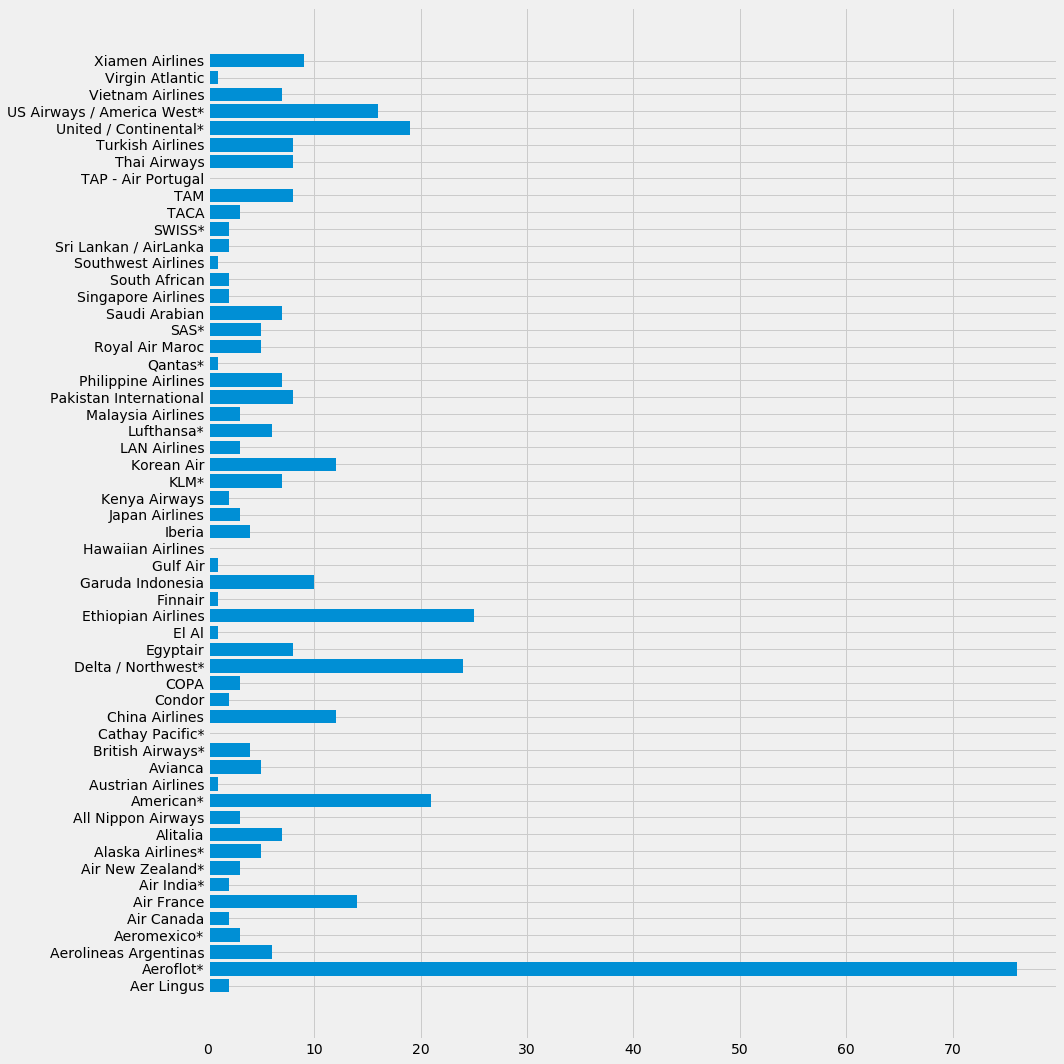

In [0]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.barh(df['airline'], df['incidents_85_99'])
fig.tight_layout();

In [0]:
df.set_index('airline', inplace=True)

In [0]:
fatality99 = df['fatalities_85_99']


In [0]:
fatality14 = df['fatalities_00_14']

In [0]:
fatality99.tail()

airline
United / Continental*         319
US Airways / America West*    224
Vietnam Airlines              171
Virgin Atlantic                 0
Xiamen Airlines                82
Name: fatalities_85_99, dtype: int64

In [0]:
fatality14.tail()

airline
United / Continental*         109
US Airways / America West*     23
Vietnam Airlines                0
Virgin Atlantic                 0
Xiamen Airlines                 0
Name: fatalities_00_14, dtype: int64

In [0]:
merged = pd.merge(fatality99, fatality14, on='airline')
merged.head()

,fatalities_85_99,fatalities_00_14
airline,,
Aer Lingus,0,0
Aeroflot*,128,88
Aerolineas Argentinas,0,0
Aeromexico*,64,0
Air Canada,0,0


In [0]:
merged.shape

(56, 2)

In [0]:
merged.reset_index(['airline'])

,airline,fatalities_85_99,fatalities_00_14
0,Aer Lingus,0,0
1,Aeroflot*,128,88
2,Aerolineas Argentinas,0,0
3,Aeromexico*,64,0
4,Air Canada,0,0
5,Air France,79,337
6,Air India*,329,158
7,Air New Zealand*,0,7
8,Alaska Airlines*,0,88
9,Alitalia,50,0


In [0]:
merged.tail()

,fatalities_85_99,fatalities_00_14
airline,,
United / Continental*,319,109
US Airways / America West*,224,23
Vietnam Airlines,171,0
Virgin Atlantic,0,0
Xiamen Airlines,82,0


In [0]:
plot_data = merged
plot_data.index = range(0,56)
plot_data.columns = ['fatalities_85_99','fatalities_00_14']
plot_data

,fatalities_85_99,fatalities_00_14
0,0,0
1,128,88
2,0,0
3,64,0
4,0,0
5,79,337
6,329,158
7,0,7
8,0,88
9,50,0


ValueError: ignored

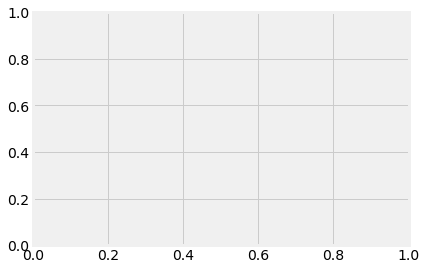

In [0]:
fig, ax = plt.subplots()
fig.patch.set(facecolor='white')
ax.barh(y=range(0, 50), height=plot_data['fatalities_85_99'], 
       width=0.9, color='#ED713A')
ax.set_(facecolor='white')
ax.set_title('Should Travelers Avoid Flying Airlines That Have Had Crashes in the Past?',
             fontsize=12,
             x=.50,
             y=1.1,
             fontweight='bold') 
ax.text(s='Airline Safety', fontsize=10, x=-1.85, y=50)
ax.set_xlabel('fatalities', fontsize=9)
ax.set_ylabel('Airlines', fontsize=9)
ax.set_xtxicklabels(range(0, 3), rotation=0)
ax.set_xticks(range(0, 3), fontsize=9)
ax.set_yticklabels(range(0, 56), fontsize=9)
ax.set_yticks(range(0, 56), fontsize=9);


# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here